# Homework 04 Solution

## Due Tuesday, March 1st

For all of the plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the default jet (rainbow) colormap!

Out of 35 points for undergrads, and out of 58 points for grads.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [here](merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

---
**Solution:**

Grading rubric [9/12 points]:

* _All points based on visual inspection of the figure_
* [3 pts] Four (correct) lines exist, one for each of the years, linestyles/colors match
* [3 pts] Labels are placed correctly for lines, and axes are displayed correctly
* [3 pts] Minor ticks, offset month names, and grid lines
* [3 pts] (Graduate) Grey fill with black line for mean exists (and looks correct)

### 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

---
**Solution:**

Grading rubric [11/11 points]:

* [3 pts] 3 functions used correctly,
* [1 pt] Aspect ratio of each plot is 1. (whether or not the x/y axis limits were set to 3)
* [3 pts] Choices are made such that the features in Z are recognizable.
* [4 pts] Aesthetics.

(-3.2, 3.2)

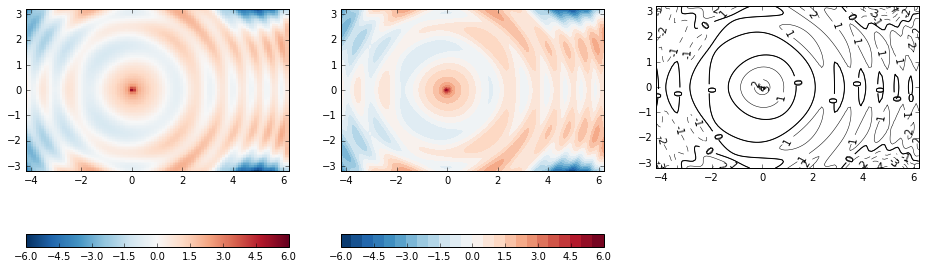

In [33]:

X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
fig, axs = plt.subplots(1, 3, figsize=(16, 7.5))
pcm = axs[0].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-6, vmax=6)
axs[0].set_aspect(1.0)
axs[0].set_xlim(-4.2, 6.2)
axs[0].set_ylim(-3.2, 3.2)
plt.colorbar(pcm, ax=axs[0], orientation='horizontal')

cnt = axs[1].contourf(X, Y, Z, np.arange(-6, 6.5, 0.5), cmap='RdBu_r')
axs[1].set_aspect(1.0)
axs[1].set_xlim(-4.2, 6.2)
axs[1].set_ylim(-3.2, 3.2)
plt.colorbar(cnt, ax=axs[1], orientation='horizontal')

cs1 = axs[2].contour(X, Y, Z, np.arange(-6, 0, 1.0), linestyles='--', colors='k', linewidths=0.5)
cs2 = axs[2].contour(X, Y, Z, np.arange(0, 6, 1.0), linestyles='-', colors='k', linewidths=0.5)
cs3 = axs[2].contour(X, Y, Z, (0,), linestyles='-', colors='k', linewidths=1)
plt.clabel(cs1,inline=1,inline_spacing=10,colors='k', fmt='%1.0f')
plt.clabel(cs2,inline=1,inline_spacing=10,colors='k', fmt='%1.0f')
plt.clabel(cs3,inline=1,inline_spacing=10,colors='k', fmt='%1.0f')
axs[2].set_aspect(1.0)
axs[2].set_xlim(-4.2, 6.2)
axs[2].set_ylim(-3.2, 3.2)



### 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

---
**Solution:**

Grading rubric [10/10 points]:

* [2 pts] plot temperature vs. salinity, using black dots to mark the data points.
* [2 pts] plot temperature vs. salinity, and color the markers with the depth;
* [2 pts] plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.
* [4 pts] Overall aesthetics (colormap choice, marker size reasonable, font size, etc)

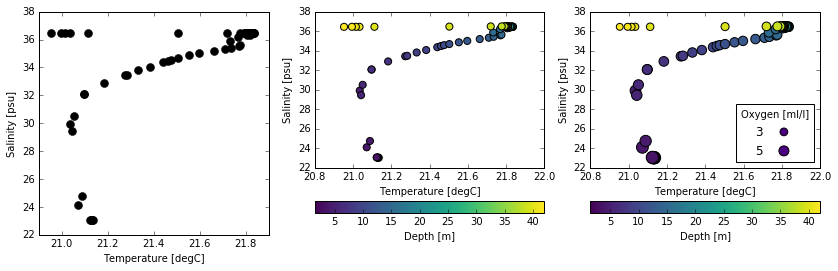

In [87]:
data = np.loadtxt('../python4geosciences/data/MCH/m1006a.cnv2', comments='*', skiprows=50)

temp = data[:, 3]
salt = data[:, 5]
depth = data[:, 1]
o2 = data[:, 7]

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].plot(temp, salt, 'ok', markersize=8)
axs[0].set_xlabel('Temperature [degC]')
axs[0].set_ylabel('Salinity [psu]')

sc = axs[1].scatter(temp, salt, 50, depth, cmap='viridis')
axs[1].set_xlabel('Temperature [degC]')
axs[1].set_ylabel('Salinity [psu]')
plt.colorbar(sc, ax=axs[1], orientation='horizontal').set_label('Depth [m]')

axs[2].scatter(temp, salt, o2*20, depth, cmap='viridis')
axs[2].set_xlabel('Temperature [degC]')
axs[2].set_ylabel('Salinity [psu]')
plt.colorbar(sc, ax=axs[2], orientation='horizontal').set_label('Depth [m]')

# To make a marker size legend or scale for the oxygen, from here: 
# http://jonathanbright.org/2014/08/12/point-size-legends-in-matplotlib-and-basemap-plots/comment-page-1/
l1 = plt.scatter([],[], s=60, label='3', color='indigo', edgecolor='k')  # this doesn't plot anything but is used to make the legend
l2 = plt.scatter([],[], s=100, label='5', color='indigo', edgecolor='k')  # this doesn't plot anything but is used to make the legend
axs[2].legend(loc='lower right', scatterpoints=1, markerfirst=False, title='Oxygen [ml/l]')


### 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

---
**Solution:**

Grading rubric [5/5 points (+2 bonus)]:

* [3 pts] Use histogram correctly
* [2 pts] Overall aesthetics

* [2 pts] BONUS Any reasonable guess at a distribution, and a corresponding plot.

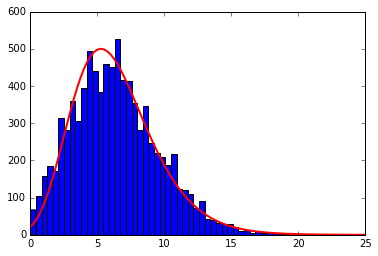

In [5]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

plt.hist(wind_speed, bins=50);

#Bonus: lognormal is a good guess.  +2 points for any reasonable guess, and a corresponding plot.
import scipy.stats
x = np.linspace(0, 25, 101)
# y = scipy.stats.chi2.pdf(x, df=7)
y = scipy.stats.lognorm.pdf(x, 0.25, scale=12, loc=-6)
y *= 500.0/y.max()
plt.plot(x, y, '-r', lw=2)

### 5. (Grad) Fit and line and plot

Load in the Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
    years = mauna_loa_co2[:, 0]
    months = mauna_loa_co2[:, 1]
    co2 = mauna_loa_co2[:, 4]


Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO$_2$ in the year 2100. Which prediction do you think is most accurate?

---
**Solution:**

Grading rubric [0/10 points]:

* [4 pts] Get proper values for the prediction
* [4 pts] Plotted data that is labeled and looks like reasonable fits. (as the first figure below)
* [2 pts] Indicate that the 5th order polynomial does a poor job at extrapolation in this case

1st order polynomial fit:   CO2 in 2100 =  521.823086501
3rd order polynomial fit:   CO2 in 2100 =  633.736851941
5th order polynomial fit:   CO2 in 2100 =  -391.7107025


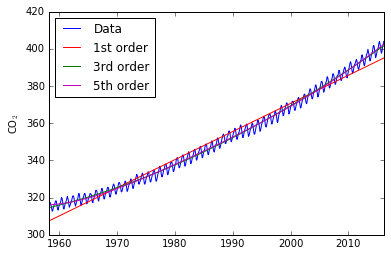

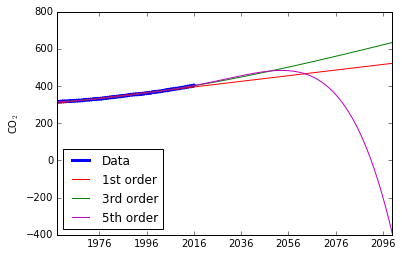

In [6]:
from datetime import datetime, timedelta

mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

refdate = datetime(1900, 1, 1)
dates = [datetime(int(year), int(month), 15) for (year, month) in zip(years, months)]
days = [(date-refdate).days for date in dates]

plt.plot(dates, co2)
plt.ylabel(r'CO$_2$')

fit1 = np.polyfit(days, co2, 1)
fit3 = np.polyfit(days, co2, 3)
fit5 = np.polyfit(days, co2, 5)

day2100 = (datetime(2100, 1, 1) - refdate).days

print('1st order polynomial fit:   CO2 in 2100 = ', np.polyval(fit1, day2100))
print('3rd order polynomial fit:   CO2 in 2100 = ', np.polyval(fit3, day2100))
print('5th order polynomial fit:   CO2 in 2100 = ', np.polyval(fit5, day2100))


plt.plot(dates, np.polyval(fit1, days), '-r')
plt.plot(dates, np.polyval(fit3, days), '-g')
plt.plot(dates, np.polyval(fit5, days), '-m')

plt.legend(('Data', '1st order', '3rd order', '5th order'), loc='upper left')

plt.figure()

fitdays = np.linspace((dates[0]-refdate).days, day2100, 1001)
fitdates = [refdate+timedelta(days=fitday) for fitday in fitdays]

plt.plot(dates, co2, lw=3)
plt.ylabel(r'CO$_2$')

plt.plot(fitdates, np.polyval(fit1, fitdays), '-r')
plt.plot(fitdates, np.polyval(fit3, fitdays), '-g')
plt.plot(fitdates, np.polyval(fit5, fitdays), '-m')
plt.ylabel(r'CO$_2$')
plt.legend(('Data', '1st order', '3rd order', '5th order'), loc='lower left')

### 6. (Grad) Make a movie

Make a movie of annual mean surface air temperature predictions from the AR4 model. Data are found in `data/surface_temp_predictions.npz`. Load the data using

    lon, lat, mean_temp = np.load('surface_temp_predictions.npz', encoding='latin1')

(The source for the data can be found [here](http://nomads.ncdc.noaa.gov/thredds/dodsC/gfdlcm2x/Stable2000/tas_A1.200101-210012.nc.html)).
Make sure your movie includes some representation of the earth (like coastlines), includes a colorbar, along with other appropriate labels.

The process will be to create a loop that creates a series of frames, labeled `frame_003.png`, for example. You will want to create a string for the filename using some code like this:

    frame_name = 'frame_%03d' % frame_number

Use [ffmpeg](https://www.ffmpeg.org) to stitch the frames together to create an H264 animation that can be played by quicktime. I use a command like this:

    $ ffmpeg -y -r 10 -i frames_%04d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

where the options mean

    -y                  Overwrite old file
    
    -r 10               Play 10 frames per second
    
    -c:v libx264        Use the H264 library
    
    -crf 15             Use a compression factor of 15 (0=lossless, 51=poor.)
                        Quicktime cannot play lossless encoded movies. 15 appears to be reasonable.

    -pix_fmt yuv420p    Special command so that quicktime can play the movie.  Note, this requires
                        an even number of pixels.  If you don't have this, you can use convert to 
                        crop a pixel off edge of the image.

See [this page]https://trac.ffmpeg.org/wiki/x264EncodingGuide for more information.    

---
**Solution:**

Grading rubric [0/10 points]:

* [2 pts] Load/prep the data
* [6 pts] Make at least one frame that correctly plots the data and looks reasonable (labels, colormap, etc)
* [2 pts] Make all the frames with the right format (like 'frame_003.png'). Frames could be made into a movie (i.e., same size)
* [0 pt] Movie created (no points, but high praise)

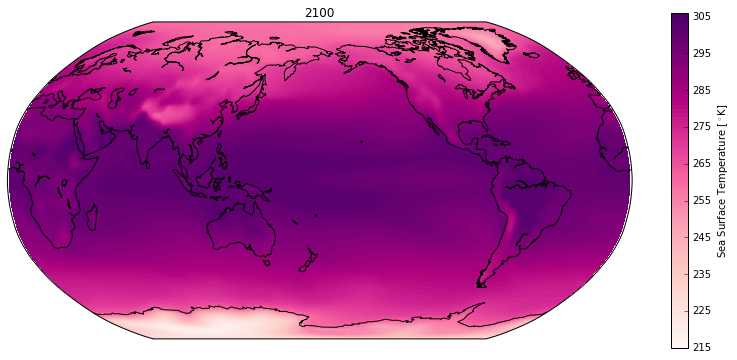

In [13]:
from mpl_toolkits.basemap import Basemap

# make a directory for figures if it doesn't exist
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

lon, lat, mean_temp = np.load('../python4geosciences/data/surface_temp_predictions.npz', encoding='latin1')['arr_0']
lon, lat = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(14,6))
m = Basemap(projection='robin', lon_0=180)
m.drawcoastlines()
x, y = m(lon, lat)

# temp_anom = mean_temp - mean_temp.mean(axis=0)

for frame, sst in enumerate(mean_temp):
    fig.clf()
    m.drawcoastlines()
    plt.contourf(x, y, sst, np.arange(215, 307), cmap='RdPu')
    plt.title(str(2001 + frame))
    plt.colorbar().set_label(r'Sea Surface Temperature [$^\circ$K]')
    plt.savefig('figures/frame_%03d.png' % frame)